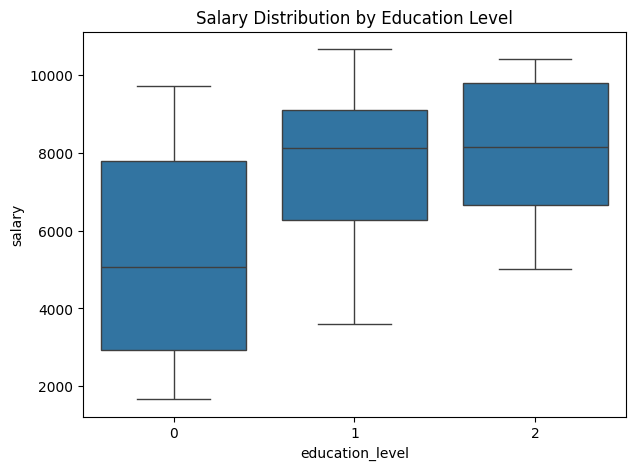

In [4]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 40
age = np.random.randint(20, 50, n)
experience = np.clip(age - np.random.randint(18, 25, n), 0, None)
education_level = np.random.choice([0, 1, 2], size=n, p=[0.3, 0.5, 0.2])


base_salary = 2000
salary = (
    base_salary
    + experience * 250
    + education_level * 1500
    + np.random.normal(0, 800, n)
)

salary = salary.astype(int)


df = pd.DataFrame({
    "age": age,
    "experience": experience,
    "education_level": education_level,
    "salary": salary
})

df.head()

df.groupby("education_level")["salary"].mean()
df[["education_level", "salary"]].corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.boxplot(x="education_level", y="salary", data=df)
plt.title("Salary Distribution by Education Level")
plt.show()


In [ ]:
df["income_per_experience"] = df["salary"] / (df["experience"] + 1)
# The +1 prevents division by zero.
df["income_per_experience"].corr(df["salary"])
# Yes/but it depends on the model type.

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


np.random.seed(42)
n = 40

age = np.random.randint(20, 50, n)
experience = np.clip(age - np.random.randint(18, 25, n), 0, None)
education_level = np.random.choice([0, 1, 2], size=n, p=[0.3, 0.5, 0.2])

salary = (
    2000
    + experience * 250
    + education_level * 1500
    + np.random.normal(0, 800, n)
).astype(int)

df = pd.DataFrame({
    "age": age,
    "experience": experience,
    "education_level": education_level,
    "salary": salary
})


df["income_per_experience"] = df["salary"] / (df["experience"] + 1)


features = ["age", "experience", "education_level", "income_per_experience"]
X = df[features]
y = df["salary"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)


r2 = model.score(X_test, y_test)
print("R² Score:", round(r2, 3))


coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})

coef_df["abs_coef"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values("abs_coef", ascending=False)

print("\nFeature Importance:")
print(coef_df)


top_feature = coef_df.iloc[0]["Feature"]
print(f"\nMost impactful feature (by absolute coefficient): {top_feature}")




R² Score: 0.811

Feature Importance:
                 Feature  Coefficient     abs_coef
2        education_level  1259.518483  1259.518483
1             experience   255.739634   255.739634
0                    age     2.710408     2.710408
3  income_per_experience     0.199674     0.199674

Most impactful feature (by absolute coefficient): education_level


Accuracy: 0.875
Precision: 1.0
Recall: 0.5


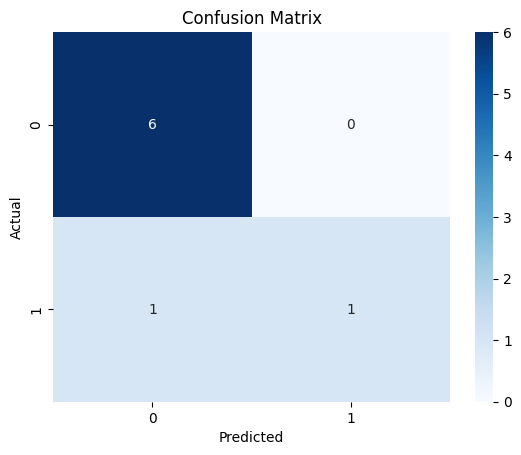


False Positives: 0
False Negatives: 1

Model has more FALSE NEGATIVES


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
n = 40

age = np.random.randint(20, 50, n)
experience = np.clip(age - np.random.randint(18, 25, n), 0, None)
education_level = np.random.choice([0, 1, 2], size=n, p=[0.3, 0.5, 0.2])

salary = (
    2000
    + experience * 250
    + education_level * 1500
    + np.random.normal(0, 800, n)
).astype(int)

df = pd.DataFrame({
    "age": age,
    "experience": experience,
    "education_level": education_level,
    "salary": salary
})

df["income_per_experience"] = df["salary"] / (df["experience"] + 1)
median_salary = df["salary"].median()
df["high_income"] = (df["salary"] > median_salary).astype(int)


features = ["age", "experience", "education_level", "income_per_experience"]
X = df[features]
y = df["high_income"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("Accuracy:", round(acc, 3))
print("Precision:", round(prec, 3))
print("Recall:", round(rec, 3))


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


tn, fp, fn, tp = cm.ravel()
print("\nFalse Positives:", fp)
print("False Negatives:", fn)

if fp > fn:
    print("\nModel has more FALSE POSITIVES")
elif fn > fp:
    print("\nModel has more FALSE NEGATIVES")
else:
    print("\nFalse Positives and False Negatives are balanced")


Logistic Accuracy: 0.875
RandomForest Accuracy: 1.0

Feature Importances (RandomForest):
                 feature  importance
1             experience    0.449147
0                    age    0.366204
3  income_per_experience    0.131998
2        education_level    0.052651


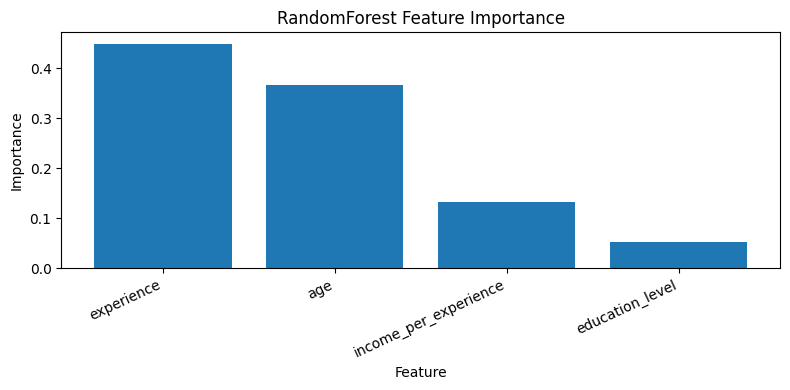

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

np.random.seed(42)
n = 40

age = np.random.randint(20, 50, n)
experience = np.clip(age - np.random.randint(18, 25, n), 0, None)
education_level = np.random.choice([0, 1, 2], size=n, p=[0.3, 0.5, 0.2])

salary = (2000 + experience * 250 + education_level * 1500 + np.random.normal(0, 800, n)).astype(int)

df = pd.DataFrame({
    "age": age,
    "experience": experience,
    "education_level": education_level,
    "salary": salary
})


df["income_per_experience"] = df["salary"] / (df["experience"] + 1)


median_salary = df["salary"].median()
df["high_income"] = (df["salary"] > median_salary).astype(int)

# -----------------------

features = ["age", "experience", "education_level", "income_per_experience"]
X = df[features]
y = df["high_income"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)

# -----------------------

rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    max_depth=None
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("Logistic Accuracy:", round(log_acc, 3))
print("RandomForest Accuracy:", round(rf_acc, 3))

# -----------------------

importances = rf_model.feature_importances_
imp_df = pd.DataFrame({
    "feature": features,
    "importance": importances
}).sort_values("importance", ascending=False)

print("\nFeature Importances (RandomForest):")
print(imp_df)
plt.figure(figsize=(8, 4))
plt.bar(imp_df["feature"], imp_df["importance"])
plt.title("RandomForest Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()
